In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_regression import nonlin_data, plot_scatter
import matplotlib.pyplot as plt

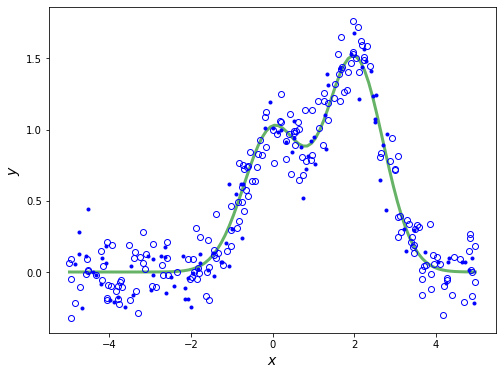

In [3]:
X_train, y_train, X_test, y_test, f_truth= nonlin_data(300)

plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, X_test, y_test, f=f_truth)
plt.show()

## 逐段常数

In [4]:
import numpy as np

In [5]:
x = X_train.copy()
y = y_train.copy().reshape(-1, 1)
x_min = np.min(x)
x_max = np.max(x)
# 设置分割点xi
xi1 = -2
xi2 = 0.1
xi3 = 0.8
xi4 = 2.1

# 分割变量
split1 = x < xi1
split2 = (x >= xi1) & (x < xi2)
split3 = (x >= xi2) & (x < xi3)
split4 = (x >= xi3) & (x < xi4)
split5 = x > xi4
y1 = y[split1]
y2 = y[split2]
y3 = y[split3]
y4 = y[split4]
y5 = y[split5]

y_pred1 = y1.mean()
y_pred2 = y2.mean()
y_pred3 = y3.mean()
y_pred4 = y4.mean()
y_pred5 = y5.mean()

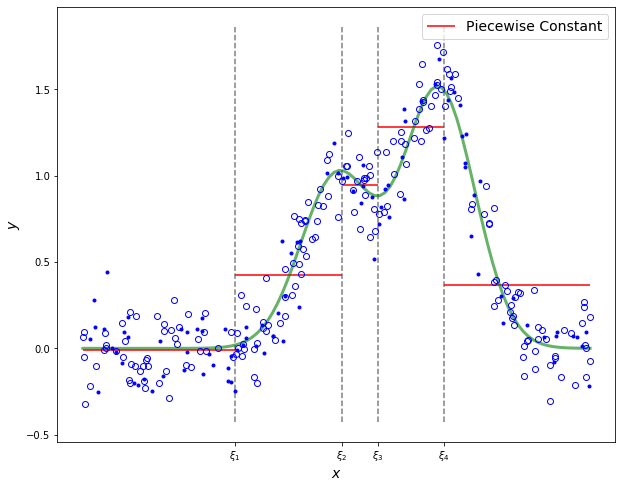

In [6]:
plt.figure(figsize=(10, 8))
plot_scatter(X_train, y_train, X_test, y_test, f=f_truth)
ylim_min = plt.ylim()[0]
ylim_max = plt.ylim()[1]
plt.vlines(xi1, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi2, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi3, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi4, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.hlines(y_pred1, x_min, xi1,  colors='r', label="Piecewise Constant")
plt.hlines(y_pred2, xi1, xi2, colors='r')
plt.hlines(y_pred3, xi2, xi3, colors='r')
plt.hlines(y_pred4, xi3, xi4, colors='r')
plt.hlines(y_pred5, xi4, x_max, colors='r')
plt.xticks(ticks=[xi1, xi2, xi3, xi4],
           labels=[r'$\xi_1$', r'$\xi_2$', r'$\xi_3$', r'$\xi_4$'])
plt.legend(fontsize=14)
plt.show()